In [1]:

from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd

import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers import Dense,Input, Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras import optimizers
import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
#from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
from random import gauss
from random import seed
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats.stats import pearsonr    


C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are differen

In [2]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'01-04 11:22'

In [3]:
import Experiment_Ready as exp


In [4]:
os.getcwd()

'C:\\Users\\murat.ozemre\\Desktop\\Thesis_Project\\Data_Learning_Prediction'

In [5]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

In [6]:
Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[0] #841810
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [7]:
Scaler_Type_Options = ['Normalizer', 'MinMaxScaler','MaxAbsScaler','RobustScaler','StandardScaler' ]
ScalerType=Scaler_Type_Options[2]
print(Product,ScalerType)

MonthSeries="3"
MonthSeries_option=["1","2","3","6","12"]
#MonthSeries_option=["12","123","1236","1236_12","__12","__126","__1263","__12632"]
#MonthSeries_option=["12","123","1236","1236_12","__12"]
#X1hat.iloc[3:,:]


841810 MaxAbsScaler


In [8]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)


In [9]:
# Set X train, X test, y train, y test
rs=42
Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

In [ ]:


# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

In [ ]:
exp.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=100,rand=20,is_random_fixed='FALSE')

In [ ]:
exp.experiment_RandomForest(3,
                  X_train, X_test, y_train, y_test,scaler_y,rand=20,is_random_fixed='FALSE')


In [ ]:
exp.experiment_RandomForest(3,
                  X_train, X_test, y_train, y_test,scaler_y,rand=20,is_random_fixed='FALSE')


In [ ]:
exp.experiment_RandomForest(2,
                  X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=50)

# RANDOM FOREST EXPERIMENTS STARTS

In [ ]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Box_Plots_For_RandomForest')

In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 1 For "max_features_options"
repeats=3

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

# Defaults for variables for the first experiment
feat=10
min_leaf=5
max_leaf=100
min_weight=0.00001
min_impurity=0.001
est=200

# Get the range for variables
max_features_options=[10,"log2","sqrt","auto"]
min_sample_leaf_options = [1,2,5,20,30]
max_leaf_nodes_options=[2,5,10,100,200,300] 
min_impurity_decrease_options =[0.000001,0.00001,0.001,0.01]
min_weight_fraction_leaf_options=[0.00001,0.0001,0.001,0.01,0.1] 
estimator_options = [100,200,500,1000,5000,10000,20000]


rs=42
    
Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]
    
    
for feat in max_features_options:
        results_exp[str(feat)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,max_features_options,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,max_features_options,max_leaf,min_weight,min_impurity))




    
    

In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 2 for max_features_options 

# Get the best of from previous experiment
feat='auto'

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

   
for min_leaf in min_sample_leaf_options:
            results_exp[str(min_leaf)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
        
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot


plt.gcf().clear()
results.boxplot()
plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_sample_leaf_options,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_sample_leaf_options,feat,max_leaf,min_weight,min_impurity))





In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 3 for max_leaf_nodes_options 

# Get the best of from previous experiment
min_leaf=1

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

  
for max_leaf in max_leaf_nodes_options:
                results_exp[str(max_leaf)]  =exp.experiment_RandomForest(repeats,
                X_train, X_test, y_train, y_test,scaler_y,
                rand=20,is_random_fixed='FALSE',
                est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])
            
## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf_nodes_options,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf_nodes_options,min_weight,min_impurity))






In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 4 for min_impurity_decrease_options

# Get the best of from previous experiment
max_leaf=200


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for min_impurity in min_impurity_decrease_options:
                results_exp[str(min_impurity)]  =exp.experiment_RandomForest(repeats,
                X_train, X_test, y_train, y_test,scaler_y,
                rand=20,is_random_fixed='FALSE',
                est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity_decrease_options))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_impu.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf,min_weight,min_impurity_decrease_options))





In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 5 for min_weight_fraction_leaf_options

# Get the best of from previous experiment
min_impurity=0.00001

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for min_weight in min_weight_fraction_leaf_options:
                results_exp[str(min_weight)]  =exp.experiment_RandomForest(repeats,
                X_train, X_test, y_train, y_test,scaler_y,
                rand=20,is_random_fixed='FALSE',
                est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_impu.png'
               .format(y.name,MonthSeries,est,min_leaf,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))





In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 6 for estimator_options

# Get the best of from previous experiment
min_weight=0.01


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for est in estimator_options:
            results_exp[str(est)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(y.name,MonthSeries,  estimator_options, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('RF-BoxP for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} minweig,{}minimp.png'
               .format(y.name,MonthSeries,estimator_options,min_leaf,feat,max_leaf,min_weight,min_impurity))


In [ ]:
# Get the best of from previous experiment
est=20000

print("Product=",y.name)
print("Month = ",MonthSeries)
print("rs for split",rs)

#Tuned Parameters after experiments
print("max_features=",feat) # EXP1
print("min_sample_leaf=", min_leaf) # EXP2
print("max_leaf_nodes=", max_leaf) # EXP3
print("min_impurity_decrease=", min_impurity) # EXP4
print("min_weight_fraction_leaf=", min_weight) # EXP5
print("est=", est) # EXP6

In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) for Before Tuning and After Tuning 

tune_options=[ 'Not_Tuned','Tuned']

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


for tune in tune_options:
    
            if tune=='Tuned':
                print(tune)
                
                results_exp[str(tune)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
            elif tune=='Not_Tuned':
                print(tune)
                
            # Defaults for variables for the first experiment

                results_exp[str(tune)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE')[1] 
    
    
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{}, Before and After Tuning, {} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity  "
          .format(y.name,MonthSeries, est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))

plt.savefig("RF-Box Plot for {}-{}, Before and After Tuning with fixed splits.png "
          .format(y.name,MonthSeries), format='png', dpi=300)




In [ ]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with different split sets) for Before Tuning and After Tuning 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


repeats=1
random_range_for_split=5

for r in range (random_range_for_split):

    rs=random.randint(1,100)

    print('split rs=',rs)
    
    Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

    X_train = Scaled_Train_Test_Split[0]
    X_test = Scaled_Train_Test_Split[1]
    y_train = Scaled_Train_Test_Split[2]
    y_test = Scaled_Train_Test_Split[3]
    scaler_X = Scaled_Train_Test_Split[4]  
    scaler_y = Scaled_Train_Test_Split[5]
    scaled_value_X=Scaled_Train_Test_Split[6]
    scaled_value_y=Scaled_Train_Test_Split[7]
     
    
    for tune in tune_options:
    
            if tune=='Not_Tuned':
                
                results_exp[str(tune)] = results_exp[str(tune)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE')[1] 

                            
            elif tune=='Tuned':
                
                results_exp[str(tune)] =exp.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
                
    results=pd.concat([results,results_exp])
    
## summarize results
print('Size:',results.size)
print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{}, Before and After Tuning, {} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity  "
          .format(y.name,MonthSeries, est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))

plt.savefig("RF-Box Plot for {}-{}, Before and After Tuning with different splits.png "
          .format(y.name,MonthSeries), format='png', dpi=300)


               


# RANDOM FOREST EXPERIMENTS END

HIC AYAR YAPMADAN FARKLI SPLIT YAPARAK RF CALISMASI
Dort Farklı Calısma Yapıldı
1. Aylık Stratify olmadan her 3 urun kodu için çalıştırıldı
2. Aylık Stratify yapılarak her 3 ürün kodu için çalıştırıldı
3. Aylık Stratify yapılarak aylık fark verisi üzerinden (Xhat) her 3 ürün kodu için çalıştırıldı 
    R2 gercek değeri alındı.
4. Aylık Stratify yapılarak aylık fark verisi üzerinden (Xhat) her 3 ürün kodu için çalıştırıldı 
    R2 o ayın gerçek değerine göre ayarlanarak alındı.


Ince Ayar Yapılmadan once (Spilt için RS sabit) ve tuning sonrasındaki karşılaştırma

# CHINA VE UK için yapılan ilk tuning çalışması sonuclar.
#X2 ve X3 için denemelerde kullanılan parametreler
estimator_options = [100,1000,2000,5000]
min_sample_leaf_options = [1,2,5,20,30]
#random_state_options =[10]
max_features_options=[10,"log2","sqrt","auto"]
max_leaf_nodes_options=[2,5,10,50,100] 
min_weight_fraction_leaf_options=[0.0001,0.001,0.01,0.1] 
min_impurity_decrease_options =[0.0000001,0.000001,0.001,0.01]

est=estimator_options[2]
min_leaf=min_sample_leaf_options[0]
feat=max_features_options[0]
max_leaf=max_leaf_nodes_options[1]
min_weight=min_weight_fraction_leaf_options[0]
min_impurity=min_impurity_decrease_options[3]

Start Set
est=2000
min_leaf=1
feat=max_10
max_leaf=5
min_weight=0.0001
min_impurity=0.001

RS =42Ye gore bulunan Tuning sonucları:
841840 için:
est=5000
min_leaf=1
feat="log2"
max_leaf=10
min_weight=0.001
min_impurity=0.0000001

841850 için:
est=2000
min_leaf=20
feat=10
max_leaf=50
min_weight=0.1
min_impurity=0.01

841810 icin
est=10000
min_leaf=2
feat="sqrt"
max_leaf=150
min_weight=0.01
min_impurity=0.000001

GENEL RS farklı oldugundaki Tuning sonucları
841850 için:


841840 için
est=10000
min_leaf=5
feat="auto"
max_leaf=100
min_weight=0.00001
min_impurity=0.001


NN 841850 için: ve RS=42 Splite göre yaıplan Tuning

alph= 1e-12
max_iteration= 50000
slv= "adam"
hidden_layer= (30, 30)

# NN BASLANGICI

In [10]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Box_Plots_For_NeuralNetworks')

In [11]:
exp.NeuralNetwork(X_train, X_test, y_train, y_test,scaler_y,rand=41)          

neuralnetwork rs= 41


((4360, 5027, 0.191), (3936, 5065, 0.166))

In [12]:
exp.experiment_NN(3,X_train, X_test, y_train, y_test,scaler_y,is_random_fixed='FALSE')    

neuralnetwork rs= 30
neuralnetwork rs= 57
neuralnetwork rs= 91


([4198, 4120, 5510], [0.462, 0.401, 0.098])

neuralnetwork rs= 21
neuralnetwork rs= 12
neuralnetwork rs= 72
neuralnetwork rs= 11
neuralnetwork rs= 16
neuralnetwork rs= 60
neuralnetwork rs= 91
neuralnetwork rs= 33
neuralnetwork rs= 16
Size: 9
          lbfgs      adam       sgd
count  3.000000  3.000000  3.000000
mean   0.740333  0.464667  0.235333
std    0.011719  0.062748  0.237622
min    0.727000  0.418000  0.033000
25%    0.736000  0.429000  0.104500
50%    0.745000  0.440000  0.176000
75%    0.747000  0.488000  0.336500
max    0.749000  0.536000  0.497000


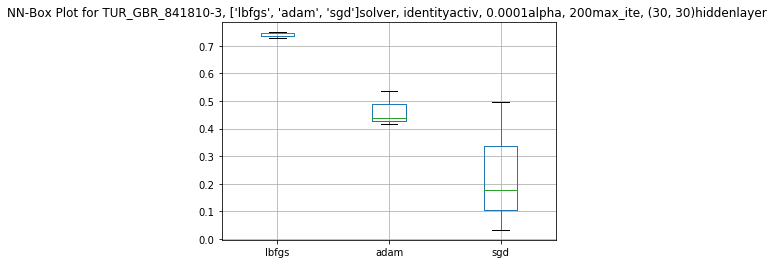

In [13]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 1 For "solver_options"

repeats=3

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

# Defaults for variables for the first experiment
slv='adam'
activ ='identity'
alph=0.0001 
max_iteration=200  
hidden_layer=(30,30)

# Get the range for variables
solver_options = ['lbfgs', 'adam','sgd' ]
activation_options = ['identity', 'logistic', 'tanh', 'relu']
alpha_options = [0.001,0.00001,0.0000001]
max_iteration_options = [1000,10000,50000,100000]
hidden_layer_sizes_options=[(10,10),(30,30),(100,100),(30,30,30),(30,100,30)]

rs=42

    
Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]
    
    
for slv in solver_options:
        results_exp[str(slv)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries, solver_options, activ, alph, max_iteration, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(y.name,MonthSeries,solver_options, activ,alph, max_iteration,hidden_layer), format='png', dpi=300)

neuralnetwork rs= 80
neuralnetwork rs= 16
neuralnetwork rs= 4
neuralnetwork rs= 15
neuralnetwork rs= 15
neuralnetwork rs= 58
neuralnetwork rs= 62
neuralnetwork rs= 70
neuralnetwork rs= 42
neuralnetwork rs= 11
neuralnetwork rs= 38
neuralnetwork rs= 38
Size: 12
       identity  logistic      tanh      relu
count  3.000000  3.000000  3.000000  3.000000
mean   0.746667  0.778333  0.770667  0.755000
std    0.011547  0.001155  0.006658  0.024249
min    0.740000  0.777000  0.763000  0.727000
25%    0.740000  0.778000  0.768500  0.748000
50%    0.740000  0.779000  0.774000  0.769000
75%    0.750000  0.779000  0.774500  0.769000
max    0.760000  0.779000  0.775000  0.769000


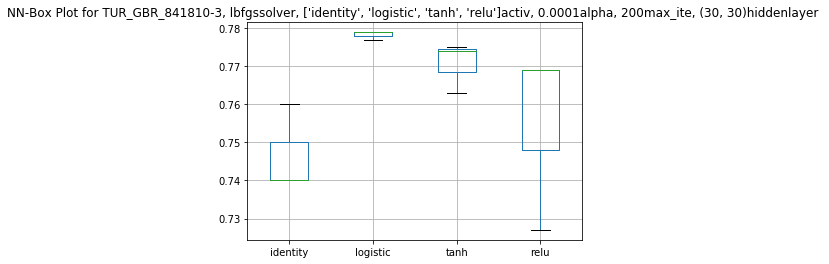

In [14]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 2 for activation__options 

slv='lbfgs'
# Get the best of from previous experiment


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for activ in activation_options:
        results_exp[str(activ)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries, slv, activation_options, alph, max_iteration, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(y.name,MonthSeries, slv, activation_options, alph, max_iteration, hidden_layer), format='png', dpi=300)

neuralnetwork rs= 74
neuralnetwork rs= 17
neuralnetwork rs= 70
neuralnetwork rs= 15
neuralnetwork rs= 68
neuralnetwork rs= 78
neuralnetwork rs= 31
neuralnetwork rs= 37
neuralnetwork rs= 22
Size: 9
          0.001     1e-05     1e-07
count  3.000000  3.000000  3.000000
mean   0.782000  0.760333  0.785333
std    0.005196  0.007638  0.038188
min    0.779000  0.752000  0.752000
25%    0.779000  0.757000  0.764500
50%    0.779000  0.762000  0.777000
75%    0.783500  0.764500  0.802000
max    0.788000  0.767000  0.827000


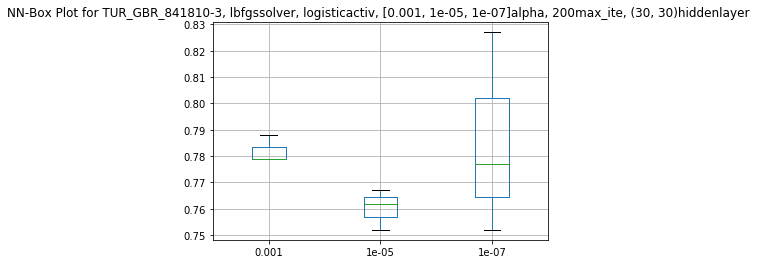

In [15]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 3 for alpha_options 

activ ='logistic'
# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

 
for alph in alpha_options:
        results_exp[str(alph)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries, slv, activ, alpha_options, max_iteration, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(y.name,MonthSeries, slv, activ, alpha_options, max_iteration, hidden_layer), format='png', dpi=300)


neuralnetwork rs= 18
neuralnetwork rs= 54
neuralnetwork rs= 41
neuralnetwork rs= 51
neuralnetwork rs= 23
neuralnetwork rs= 7
neuralnetwork rs= 79
neuralnetwork rs= 15
neuralnetwork rs= 91
neuralnetwork rs= 51
neuralnetwork rs= 6
neuralnetwork rs= 41
neuralnetwork rs= 37
neuralnetwork rs= 40
neuralnetwork rs= 85
Size: 15
       (10, 10)  (30, 30)  (100, 100)  (30, 30, 30)  (30, 100, 30)
count  3.000000  3.000000      3.0000      3.000000       3.000000
mean   0.770667  0.771333      0.7770      0.779333       0.777000
std    0.008327  0.000577      0.0030      0.013868       0.007937
min    0.764000  0.771000      0.7740      0.764000       0.771000
25%    0.766000  0.771000      0.7755      0.773500       0.772500
50%    0.768000  0.771000      0.7770      0.783000       0.774000
75%    0.774000  0.771500      0.7785      0.787000       0.780000
max    0.780000  0.772000      0.7800      0.791000       0.786000


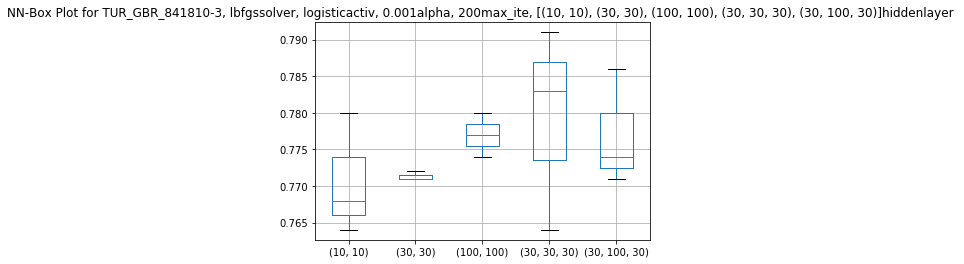

In [16]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 4 for hidden_layer_sizes_options

alph=0.001

# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for hidden_layer in hidden_layer_sizes_options:
        results_exp[str(hidden_layer)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries, slv, activ, alph, max_iteration, hidden_layer_sizes_options))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(y.name,MonthSeries, slv, activ, alph, max_iteration, hidden_layer_sizes_options), format='png', dpi=300)


neuralnetwork rs= 8
neuralnetwork rs= 64
neuralnetwork rs= 48
neuralnetwork rs= 56
neuralnetwork rs= 37
neuralnetwork rs= 77
neuralnetwork rs= 3
neuralnetwork rs= 26
neuralnetwork rs= 53
neuralnetwork rs= 54
neuralnetwork rs= 89
neuralnetwork rs= 79
Size: 12
           1000     10000     50000    100000
count  3.000000  3.000000  3.000000  3.000000
mean   0.563333  0.763000  0.761667  0.777000
std    0.363159  0.012288  0.014364  0.004359
min    0.144000  0.749000  0.751000  0.772000
25%    0.457500  0.758500  0.753500  0.775500
50%    0.771000  0.768000  0.756000  0.779000
75%    0.773000  0.770000  0.767000  0.779500
max    0.775000  0.772000  0.778000  0.780000


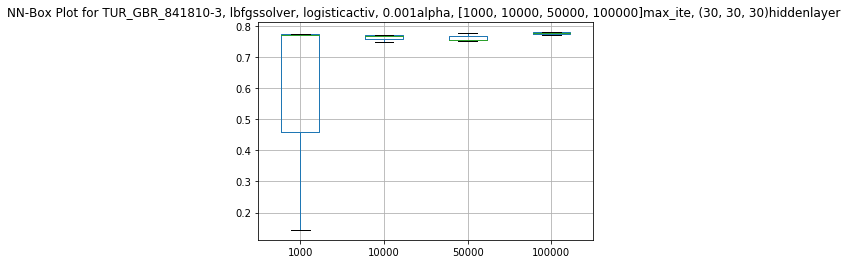

In [17]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 5 for max_iteration_options

hidden_layer=(30,30,30)

# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for max_iteration in max_iteration_options:
        results_exp[str(max_iteration)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries, slv, activ, alph, max_iteration_options, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(y.name,MonthSeries, slv, activ, alph, max_iteration_options, hidden_layer), format='png', dpi=300)


In [18]:
max_iteration=100000
# Get the best of from previous experiment

print("Product=",y.name)
print("Month = ",MonthSeries)
print("rs for split",rs)

#Tuned Parameters after experiments
print("solver=",slv) # EXP1
print("activity=", activ) # EXP2
print("alpha=", alph) # EXP3
print("hidden_layer=", hidden_layer) # EXP4
print("max_iteration", max_iteration) # EXP5


Product= TUR_GBR_841810
Month =  3
rs for split 42
solver= lbfgs
activity= logistic
alpha= 0.001
hidden_layer= (30, 30, 30)
max_iteration 100000


Not_Tuned
neuralnetwork rs= 59
neuralnetwork rs= 58
neuralnetwork rs= 95
Tuned
neuralnetwork rs= 74
neuralnetwork rs= 90
neuralnetwork rs= 65
Size: 6
       Not_Tuned     Tuned
count   3.000000  3.000000
mean    0.323333  0.520333
std     0.284978  0.423974
min     0.007000  0.031000
25%     0.205000  0.391500
50%     0.403000  0.752000
75%     0.481500  0.765000
max     0.560000  0.778000


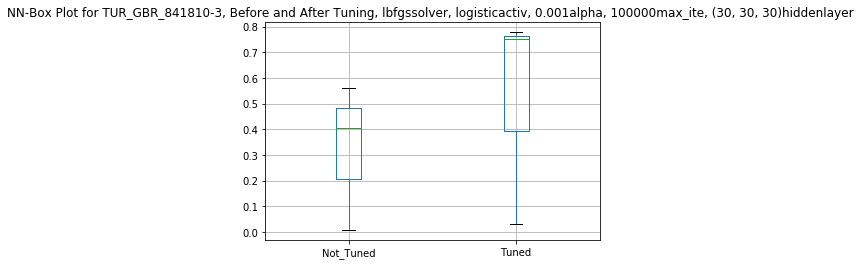

In [20]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) for Before Tuning and After Tuning 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

tune_options=[ 'Not_Tuned','Tuned']

for tune in tune_options:

        if tune=='Tuned':
            print(tune)
            

            results_exp[str(tune)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
        elif tune=='Not_Tuned':
            print(tune)
                
            # Defaults for variables for the first experiment
            results_exp[str(tune)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE')[1] 
    
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("NN-Box Plot for {}-{}, Before and After Tuning, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries, slv, activ, alph, max_iteration,hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, Before and After Tuning with fixed splits.png "
          .format(y.name,MonthSeries), format='png', dpi=300)


split rs= 25
neuralnetwork rs= 60
neuralnetwork rs= 98
neuralnetwork rs= 100
neuralnetwork rs= 12
neuralnetwork rs= 17
neuralnetwork rs= 72
split rs= 43
neuralnetwork rs= 43
neuralnetwork rs= 2
neuralnetwork rs= 3
neuralnetwork rs= 54
neuralnetwork rs= 70
neuralnetwork rs= 54
split rs= 79
neuralnetwork rs= 22
neuralnetwork rs= 6
neuralnetwork rs= 68
neuralnetwork rs= 46
neuralnetwork rs= 15
neuralnetwork rs= 53
split rs= 17
neuralnetwork rs= 99
neuralnetwork rs= 44
neuralnetwork rs= 34
neuralnetwork rs= 8
neuralnetwork rs= 88
neuralnetwork rs= 90
split rs= 11
neuralnetwork rs= 12
neuralnetwork rs= 2
neuralnetwork rs= 89
neuralnetwork rs= 88
neuralnetwork rs= 9
neuralnetwork rs= 58
Size: 30
       Not_Tuned      Tuned
count  15.000000  15.000000
mean    0.456867   0.636067
std     0.224382   0.277072
min     0.105000   0.031000
25%     0.252000   0.750500
50%     0.495000   0.770000
75%     0.662000   0.774000
max     0.759000   0.783000


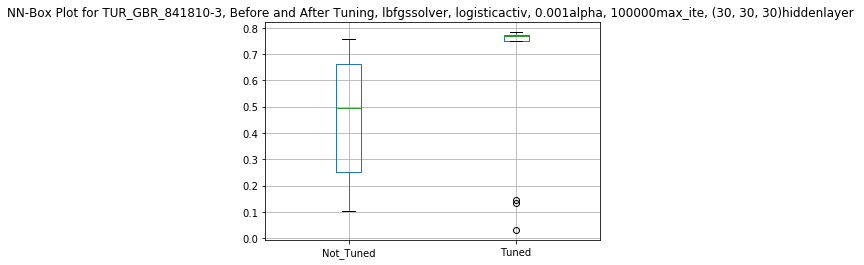

In [24]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with different split sets) for Before Tuning and After Tuning 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


repeats=3
random_range_for_split=5

for r in range (random_range_for_split):

    rs=random.randint(1,100)

    print('split rs=',rs)
    
    Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z,random=rs)

    X_train = Scaled_Train_Test_Split[0]
    X_test = Scaled_Train_Test_Split[1]
    y_train = Scaled_Train_Test_Split[2]
    y_test = Scaled_Train_Test_Split[3]
    scaler_X = Scaled_Train_Test_Split[4]  
    scaler_y = Scaled_Train_Test_Split[5]
    scaled_value_X=Scaled_Train_Test_Split[6]
    scaled_value_y=Scaled_Train_Test_Split[7]
     
    
    for tune in tune_options:
    
            if tune=='Not_Tuned':
                
                results_exp[str(tune)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE')[1] 
                        
            elif tune=='Tuned':
                
                results_exp[str(tune)] =exp.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
              
    results=pd.concat([results,results_exp])
    
## summarize results
print('Size:',results.size)
print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, Before and After Tuning, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(y.name,MonthSeries,slv, activ, alph, max_iteration,hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, Before and After Tuning with different splits.png "
          .format(y.name,MonthSeries), format='png', dpi=300)


# NN SONU

# LSTM EXPERIMENT (with fixed split set) SECTION

In [ ]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Plots_for_LSTM')

In [ ]:
results = DataFrame()

repeats = 1
e=500
n=100
lr=0.001
b=50
deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)
deney[1] 

In [ ]:
#rs=29
rs=42
repeats = 1
drop_rate=0.0
do_batch='TRUE'
do_model='B'
random_split='TRUE'

e=5
n=300
lr=0.01
b=1

# Set X train, X test, y train, y test
rs=42
Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X,y,Z,random=rs)

X_train = Scaled_Train_Test_Split[0].values
X_test = Scaled_Train_Test_Split[1].values
y_train = Scaled_Train_Test_Split[2].values
y_test = Scaled_Train_Test_Split[3].values
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,X_train, X_test, y_train, y_test,scaler_X,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

In [ ]:
results = DataFrame()
repeats = 10
e=100
n=50
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for b in batch_sizes:
            results_exp[str(b)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size "
          .format(y.name,MonthSeries,e,n,lr,batch_sizes))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{}lr,{}bsize.png'
               .format(y.name,MonthSeries,e,n,lr,batch_sizes))

In [ ]:
#rs=29
rs=42
repeats = 1
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

e=200
n=400
lr=0.001
b=30

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]

deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

In [ ]:

#repeats=10
e=2000
n=100
lr=0.05
b=50

neurons = [5, 50, 100]
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for n in neurons:
            results_exp[str(n)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size"
          .format(y.name,MonthSeries,e,neurons,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{},lr{}, b.png'
               .format(y.name,MonthSeries,e,neurons,lr,b))


In [ ]:
# LSTM EXPERIMENT

#def experiment(repeats,n_epochs,n_neurons,learning_rate,bs,rs,X,y,date):
def experiment_LSTM(repeats,n_epochs,n_neurons,learning_rate,bs,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y):
    K.clear_session()

#    print(type(train_X))
    train_X =train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#    train_X =train_X.reshape((train_X.shape[0], train_X.shape[1],1))
#    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],1))
#    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
    
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        print('Shape of X Train',train_X.shape[1],train_X.shape[2])
    

        if do_model=='A':
            model = Sequential() 
            model.add(LSTM(n_neurons,input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(n_neurons))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(1))
#            model.add(Activation('sigmoid'))
            model.add(Activation('linear'))
        
        elif do_model=='B':   
            input_layer=Input(shape=(train_X.shape[1], train_X.shape[2]),dtype='float32')
            lstm_layer1=LSTM(n_neurons,input_shape=(train_X.shape[1],train_X.shape[2]),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=True)(input_layer)
            lstm_layer2=LSTM(n_neurons,input_shape=(train_X.shape[1],n_neurons),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=False)(lstm_layer1)
            dropout_layer=Dropout(drop_rate)(lstm_layer2)

            output_layer=Dense(1,activation="linear")(dropout_layer)
#            output_layer=Dense(1,activation="linear")(lstm_layer2)
         

        #ix layerlarda Activation için RELU Output için linear uygun oluyor. Kaynak Siraj Raval
        
            model=Model(inputs=input_layer, outputs=output_layer)
        
        
        #decay_rate = learning_rate / n_epochs
        
        decay_rate = 0.8
        momentum = 0.9
         
        sgd = optimizers.SGD(lr=learning_rate, clipvalue=0.3,momentum=momentum, decay=decay_rate,nesterov=True)
        adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

        #model.compile(loss='mean_squared_error', optimizer='adam')
        
        
#        model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))

        model.summary()
        
        save_weights_at=os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons))

        save_best=ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                                 save_best_only=True, save_weights_only=False, mode='min',
                                 period=1)
        
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
        early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=bs, 

                            validation_data=(test_X, test_y), verbose=1, 
#                            callbacks=[reduce_lr],
                           # callbacks=[save_best],

                           # callbacks=[early_stop],
                            shuffle=False)

#        best_model=load_model(os.path.join('Data','train_dataset.hdf5')
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(y.name,n_neurons)))

        #model=best_model

        
        

        
        # summarize history for loss
        plt.gcf().clear()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        
        # summarize history for accuracy
#        plt.plot(history.history['acc'])
#        plt.plot(history.history['val_acc'])
#        plt.title('model accuracy')
#        plt.ylabel('accuracy')
#        plt.xlabel('epoch')
#        plt.legend(['train', 'test'], loc='upper left')
#        plt.show()


#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X_reshaped)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])

        # make a prediction
        y_predict_test = model.predict(test_X)
        y_predict_train = model.predict(train_X)

        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
        
        plt.gcf().clear()
        plt.figure(figsize=(5.5, 5.5))
        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
        plt.legend(['Actual','Predicted'], loc=2)
        plt.title('Actual vs Predicted for {}'.format(y.name))
        plt.ylabel('Trade Value')
        plt.xlabel('Index')
        plt.savefig('LSTM-LinePlt{} ,{} epochs,{} neurons,{} learning_rate,{} batch size, {} random, {} R2.png'.format(y.name,
                                n_epochs,n_neurons,learning_rate,bs,rs,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y,history

In [ ]:
results = DataFrame()

repeats = 1

# vary training epochs"
epochs = [50, 500, 1000,2000]
neurons = [5, 50,100]
learning_rates= [0.001, 0.01, 0.05, 0.1]
batch_sizes=[5, 12, 24,50,100]


e=3000
n=200
lr=0.02
b=50


e=500
n=100
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for e in epochs:
            results_exp[str(e)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
print(results.describe())
#save boxplot
plt.gcf().clear()

results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate, {}batch size "
          .format(y.name,MonthSeries,epochs,n,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons {}lr,{}b.png'
               .format(y.name,MonthSeries,epochs,n,lr,b))


